# Lighting condition visualisation of images generated by the Unity Perception plugin.

This notebook visualises the images generated by the Perception Camera in the Unity Robolab environment.
The goal of this notebook is to visualise the different lighting conditions in the dataset at the positions on the field.
For the model to train propely on different lighting conditions, a high variance in lighting is wanted across the entire field. If the dataset does not have a high variance in lighting conditions, the model will only learn to recognise the location under the specific conditions that were included in the dataset, but this might not translate well to real-world performance.

### **Dependencies**
To install the dependencies of this notebook, enter the following commands in the terminal:<br><br>
To install scikit-image:<br>
pip3 install scikit-image<br>

To install the matplotlib textures:<br>
pip3 install matplotlib<br>
pip3 install mplsoccer

In [1]:
from pysolotools.consumers import Solo

# Load the SOLO dataset from the solo folder
try:
    dataset = Solo(data_path="solo10k")
except Exception as e:
    print("Error opening folder, error message:", e)
    print("Please add a SOLO dataset in a folder named 'solo' in this directory")

In [2]:
# This cell loads all the images from the dataset into a single array of cv2 images.
import cv2
from os import path

img_filename = "step1.camera.png"
captures = dataset.metadata.totalSequences
filenames = [path.join(f"solo10k/sequence.{i}", img_filename) for i in range(captures)]

# Get the position of each image on the field. This is needed to place the
# image on the correct location of the plot.
positions = [capture[0].position for capture in [frame.captures for frame in dataset.frames()] if len(capture) > 0]

def get_image(index):
    """
    Yield a single image from the dataset at the given index.
    It is not needed to store every image from a large dataset in memory, as the
    exposure can be calculated on a single image and then that image can be
    removed from memory. Therefore the yield.
    """
    yield cv2.imread(filenames[index])

In [3]:
import numpy as np

# Calculate the average intensity of each image.
avg_intensity = [np.mean(cv2.cvtColor(next(get_image(i)), cv2.COLOR_BGR2GRAY)) for i in range(captures)]

# Transform Unity coordinates into Matplotlib coordinates
x = [((x ) ) * 1.333333333333333 for x, _, _ in positions]
y = [((y ) ) * 1.333333333333333 for _, _, y in positions]

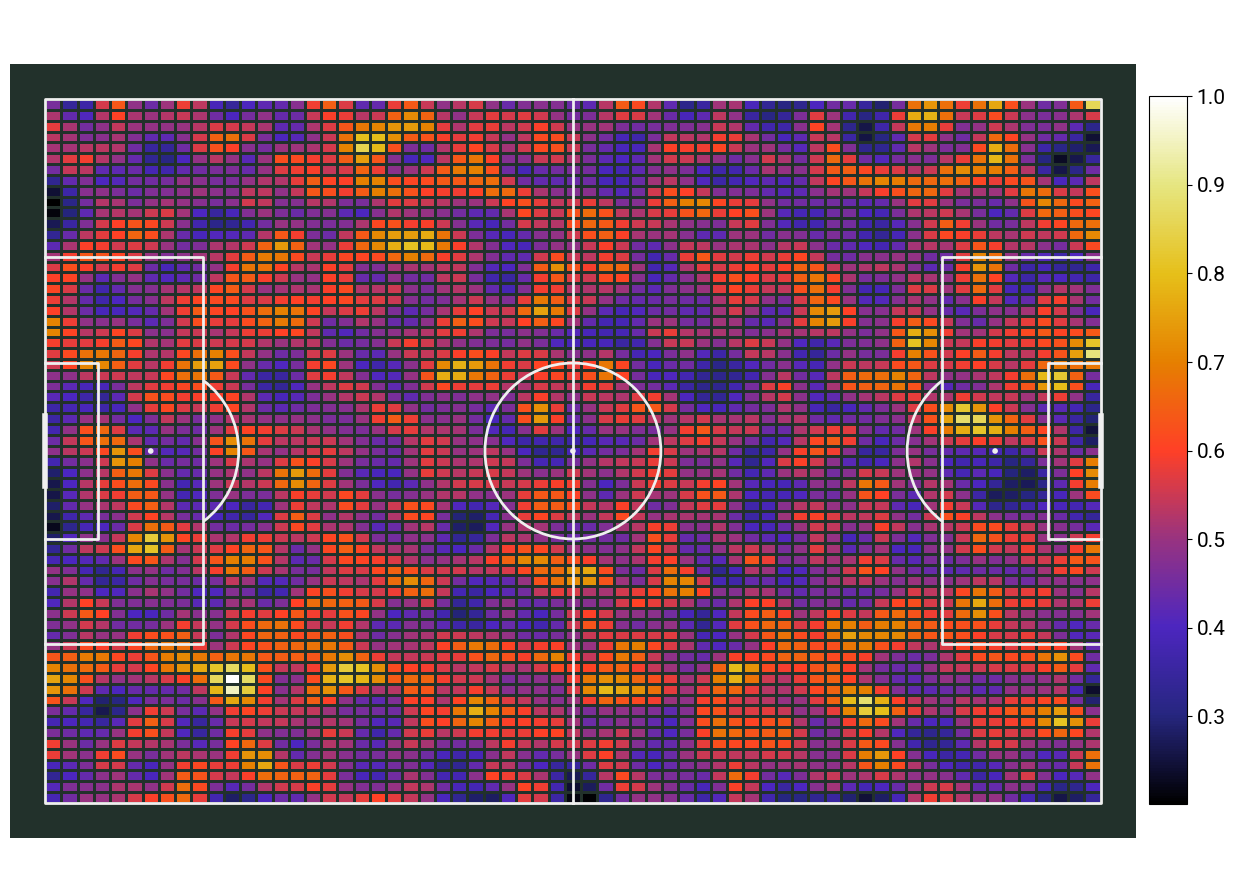

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mplsoccer import Pitch, FontManager
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap

# Setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')

# Draw
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)
# fig.set_facecolor('#22312b')
fig.set_facecolor('white')

bin_statistic = pitch.bin_statistic(x, y, avg_intensity , statistic='count', bins=(65, 65))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

# Normalize count values
count_norm = colors.Normalize(vmin=0, vmax=bin_statistic['statistic'].max())
bin_statistic['statistic'] = count_norm(bin_statistic['statistic'])
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='CMRmap', edgecolors='#22312b')

# Add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
robotto_regular = FontManager()
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)

# Endnote and title
axs['endnote'].text(1, 0.5, "",  va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.5, f"",
                             color='white',
                             va='center', ha='center',
                             fontproperties=robotto_regular.prop, fontsize=30)

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

plt.show()

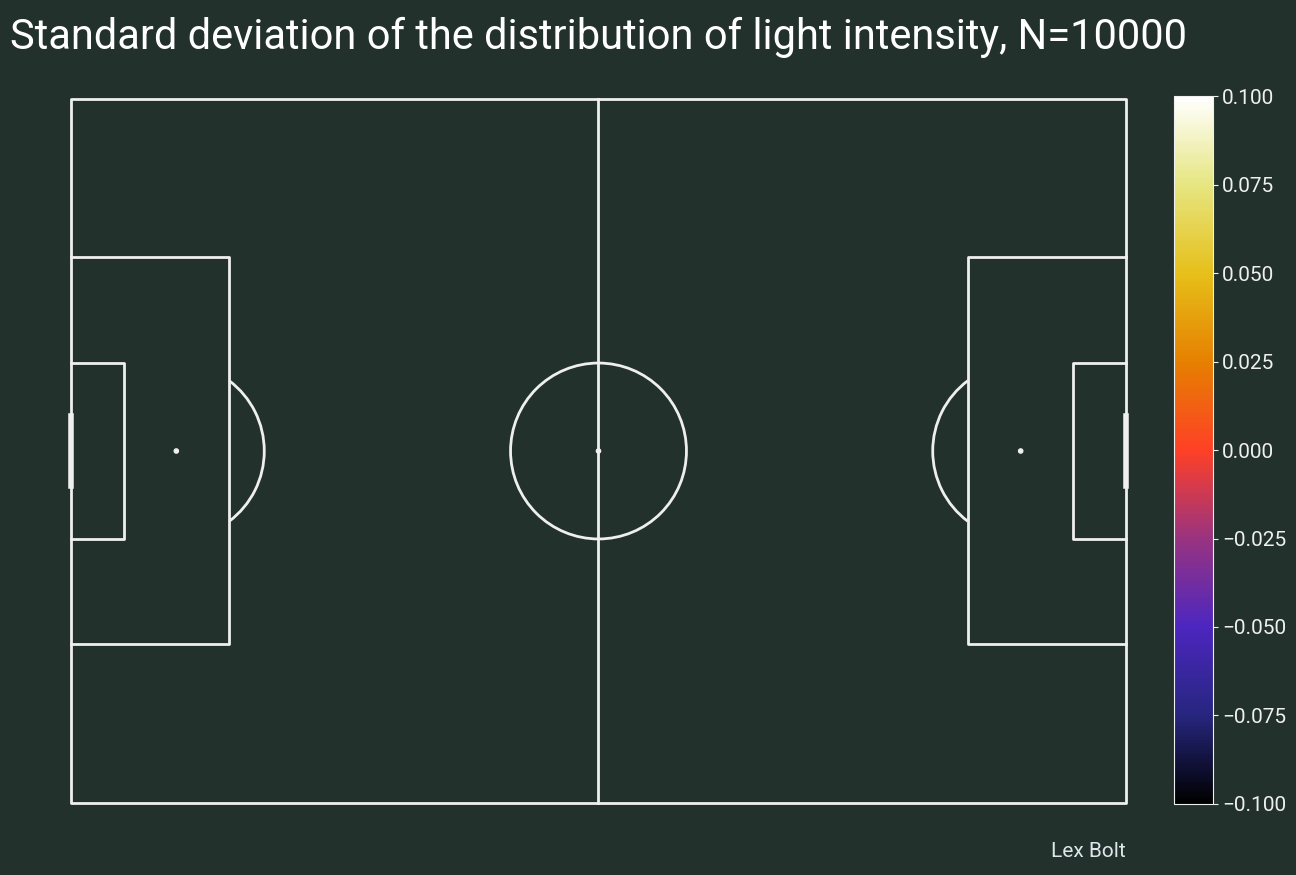

In [5]:
# Setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')

# Draw
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(x, y, avg_intensity, statistic='std', bins=(65, 65))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

# Normalize count values
count_norm = colors.Normalize(vmin=0, vmax=bin_statistic['statistic'].max())
bin_statistic['statistic'] = count_norm(bin_statistic['statistic'])
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='CMRmap', edgecolors='#22312b')
# Blues_r, CMRmap

# Add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
robotto_regular = FontManager()
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)

# Endnote and title
axs['endnote'].text(1, 0.5, 'Lex Bolt', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.5, f"Standard deviation of the distribution of light intensity, N={captures}",
                             color='white',
                             va='center', ha='center',
                             fontproperties=robotto_regular.prop, fontsize=30)

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

plt.show()